<a href="https://colab.research.google.com/github/lourencocavalcante/Fuzzy-Logic/blob/main/CAP424_2022_Exercicios_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# <span style="color:#336699; text-align: center;">Trabalho Final da disciplina de Lógica Nebulosa (CAP-424)</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 110%;">
    <b>CAP-424 – Lógica Nebulosa (Fuzzy Logic)</b>
    <br/>
    <b>Docente:</b> Dr. Lamartine Nogueira Frutuoso Guimarães
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Objetivo: </b> O principal objetivo deste caderno notebook é apresentar as questões propostas pelo professor em torno das discussões ocorridas durante a disciplina de Lógica Nebulosa (CAP-424) e suas respectivas soluções, como trabalho final da disciplina. O livro adotado pelo professor foi "Fuzzy and Neural Approaches in Engineering (1st. ed.)" de autoria de Tsoukalas e Robert E. Uhrig.
</div>

<span style="text-align: center;"> Este caderno notebook também pode ser visualizado no meu diretório de materiais e atividades da disciplina **CAP-324** no **Github**,  [Clicando aqui](https://github.com/lourencocavalcante/Fuzzy-Logic.git) </span>

# **Lógica Nebulosa (Fuzzy Logic)**

Na lógica convencional (binária), um elemento pertence ou não pertence a um determinado conjunto, e nunca se encontra entre estes dois estados possíveis. Esta é uma maneira de simplificar um mundo inerentemente complexo, mas - argumentam os defensores da lógica nebulosa - esta simplificação acaba por distorcer a realidade (GRINT, 1997). A lógica nebulosa é um método que permite expressar incertezas de maneira mais consistente, através dos conjuntos nebulosos: ao invés de simplesmente pertencer ou não pertencer, um elemento poderá ter vários graus de pertinência a um conjunto. 

O conceito de lógica nebulosa (fuzzy logic ou LN) foi introduzido por Lotfi Zadeh em 1965, como uma forma de reduzir e explicar a complexidade de sistemas (Cox, 1998). Esta idéia permaneceu praticamente desconhecida pelo grande público até o final da década de 1980, quando o metrô de Sendai adotou um sistema baseado na LN - o Automatic Train Operator (ATO) - e surgiram várias empresas que tinham o objetivo de desenvolver e comercializar produtos baseados nesta tecnologia. Apesar de o interesse comercial haver arrefecido, hoje é possível encontrar aplicações da lógica nebulosa em áreas bem diferentes daquela em que surgiu

Os conjuntos nebulosos (fuzzy sets) são funções que mapeiam, em uma escala de zero a um, esta pertinência de um determinado elemento ao conjunto. O valor zero indica que o elemento não pertence ao conjunto, enquanto o valor um significa que o elemento é completamente representativo do conjunto; valores entre estes dois indicam graus intermediários de pertinência.

Com conjuntos nebulosos é possível realizar várias operações - as básicas são interseção, união e complemento - e, com regras de inferência (policies), criar modelos que auxiliem na tomada de decisão.

# **Chapter 2 problems**


## **Problem 5**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/2chapter-problem5.PNG?raw=true" width = 600 align="left">

## **Problem 6**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/2chapter-problem6.PNG?raw=true" width = 600 align="left">

## **Problem 7**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/2chapter-problem7.PNG?raw=true" width = 600 align="left">

Possível solução (proposta pelo discente LEANDRO)

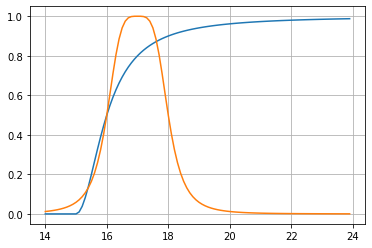

In [2]:
#Importação das bibliotecas necessárias

from math import sqrt
from turtle import color
import numpy as np
import math
import matplotlib.pyplot as plt

#-------------------------------------
plt.figure()

def miA(x):
    if x > 15:
        eq = 1+((x-15)**(-2))
        uA = 1/eq
    else:
        uA = 0
        
    return uA

def miB(x):
    eq = 1+((x-17)**4)
    uB = 1/eq
    return uB


d = 14
x = np.zeros((100))
y = np.zeros((100))
z = np.zeros((100))


# create data
for i in range(0,100):
    y[i] = miA(d)
    z[i] = miB(d)
    x[i] = d
    d = d + 0.1

#x = [12,13,14,15,16,17,18,19,20,21]
#y = [miA(12),miA(13),miA(14),miA(15),miA(16),miA(17),miA(18),miA(19),miA(20),miA(21)]

#z = [miB(12),miB(13),miB(14),miB(15),miB(16),miB(17),miB(18),miB(19),miB(20),miB(21)]
  
# plot line
plt.plot(x,y)
plt.plot(x,z)
plt.grid()
plt.show()

## **Problem 8**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/2chapter-problem8.PNG?raw=true" width = 600 align="left">

## **Problem 9**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/2chapter-problem9.PNG?raw=true" width = 600 align="left">

## **Problem 11**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/2chapter-problem11.PNG?raw=true" width = 600 align="left">

Possível solução (proposta pelo discente LEANDRO)

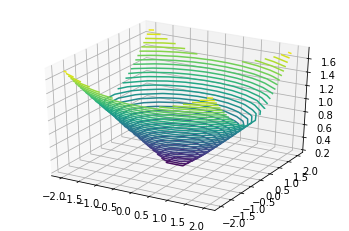

In [4]:
#Importação das bibliotecas necessárias
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

#--------------------------------------
def f(x,y):
    return (((x**2)/4)+((y**2)/2))** 0.5

u = np.linspace(-2,2,10)
v = np.linspace(-2,2,10)
u, v = np.meshgrid(u,v)

x=u
y=v
z=f(u,v)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(x,y,z,30)
plt.show()

# **Chapter 3 problems**

<img src="https://github.com/lourencocavalcante/Fuzzy-Logic/blob/90c9f4ea04cee22074c3e8d8f5678eb7965bc230/Questions/3chapter-problem1.PNG?raw=true" width = 650 align="left">


# **Referências**

1. Grint, K. (1997). Fuzzy management: contemporary ideas and practices at work New York: Oxford.

2. Lefteri H. Tsoukalas and Robert E. Uhrig. 1996. Fuzzy and Neural Approaches in Engineering (1st. ed.). John Wiley &amp; Sons, Inc., USA.

3. Wuerges, Artur Filipe Ewald e Borba, José AlonsoRedes neurais, lógica nebulosa e algoritmos genéticos: aplicações e possibilidades em finanças e contabilidade. JISTEM - Journal of Information Systems and Technology Management [online]. 2010, v. 7, n. 1 [Acessado 9 Novembro 2022] , pp. 163-182. Disponível em: <https://doi.org/10.4301/S1807-17752010000100007>. Epub 22 Nov 2010. ISSN 1807-1775. https://doi.org/10.4301/S1807-17752010000100007.